## **Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Load and inspect the data**

In [2]:
import pandas as pd

path = '/content/drive/My Drive/Colab Notebooks/DeepLearning/hw3/'

df_raw = pd.read_csv(path + 'data/TSLA.csv', header=0)

df = df_raw.copy(deep=True)


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


In [4]:
pd.DataFrame([[df.shape[0], df.shape[1]]], columns=['# rows', '# columns' ])

,# rows,# columns
0,1259,7


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,64.594124,65.883341,63.272302,64.642060,64.642060,3.979012e+07
std,33.400757,34.457933,32.308613,33.518742,33.518742,2.928062e+07
min,28.464001,30.993999,28.209999,28.733999,28.733999,3.540000e+06
25%,45.861999,46.425002,45.063001,45.887001,45.887001,2.158075e+07
50%,56.765999,57.888000,55.776001,56.945999,56.945999,3.081300e+07
75%,67.962001,69.039001,66.736000,67.790001,67.790001,4.658400e+07
max,281.002014,285.899994,270.256012,278.855988,278.855988,3.046940e+08


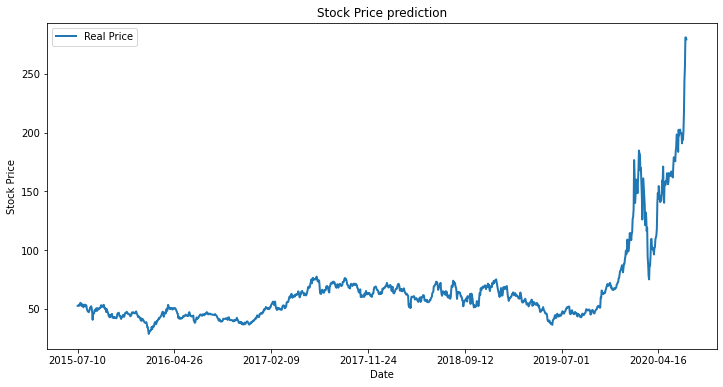

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(12, 6))

plt.plot(df.loc[:, 'Date'], df.iloc[:, 1:2].values, lw=2, label = 'Real Price')

plt.xticks(np.arange(0, len(df), 200))
plt.title('Stock Price prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## **Split the data**

In [7]:
import numpy as np

nrow = 800
train_set = df.iloc[:nrow, 1:2].values
test_set = df.iloc[nrow:, 1:2].values

## **Normalize the data**

In [8]:
from sklearn.preprocessing import MinMaxScaler

sc  = MinMaxScaler(feature_range=(0, 1))
train_set_scaled = sc.fit_transform(train_set)


## **Build the input features with different time lags**

In [9]:
def preprocess_data(lag, train_set_scaled, len_train_set_scaled):
    X_train = []
    y_train = []
    for i in range(lag, len_train_set_scaled):
        X_train.append(train_set_scaled[i-lag:i, 0])
        y_train.append(train_set_scaled[i, 0])

    X_train, y_train = np.array(X_train), np.array(y_train)

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
   
    return X_train, y_train
    

In [10]:
X_train_lag1, y_train_lag1 = preprocess_data(1, train_set_scaled, len(train_set_scaled)) 

X_train_lag7, y_train_lag7 = preprocess_data(7, train_set_scaled, len(train_set_scaled))

X_train_lag14, y_train_lag14 = preprocess_data(14, train_set_scaled, len(train_set_scaled))

In [11]:
print("The shape of X_train_lag1: ", X_train_lag1.shape)
print("The shape of X_train_lag7:", X_train_lag7.shape)
print("The shape of X_train_lag14:", X_train_lag14.shape)

The shape of X_train_lag1:  (799, 1, 1)
The shape of X_train_lag7: (793, 7, 1)
The shape of X_train_lag14: (786, 14, 1)


## **Build the model**

In [12]:
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error

def model_LSEM(n_units, drop_rate, X_train):
    model = Sequential()

    model.add(LSTM(units = n_units, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    model.add(Dropout(drop_rate))

    model.add(LSTM(units = n_units, return_sequences = True))
    model.add(Dropout(drop_rate))

    model.add(LSTM(units = n_units, return_sequences = True))
    model.add(Dropout(drop_rate))

    model.add(LSTM(units = n_units))
    model.add(Dropout(drop_rate))

    model.add(Dense(units = 1))

    return model
    

## **Train the model with the lag1 input feature**

In [13]:
model_lag1 = model_LSEM(50, 0.2, X_train_lag1)

model_lag1.compile(optimizer = 'adam', loss = 'mean_squared_error')

model_lag1.fit(X_train_lag1, y_train_lag1, epochs = 100, batch_size = 32)


Epoch 1/100
25/25 [==============================] - 19s 13ms/step - loss: 0.2726
Epoch 2/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0914
Epoch 3/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0391
Epoch 4/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0290
Epoch 5/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0174
Epoch 6/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0120
Epoch 7/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0089
Epoch 8/100
25/25 [==============================] - 0s 18ms/step - loss: 0.0089
Epoch 9/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0082
Epoch 10/100
25/25 [==============================] - 0s 13ms/step - loss: 0.0080
Epoch 11/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0080
Epoch 12/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0080
Epoch 13/100
25/25 [====

## **Train the model with the lag7 input feature**

In [14]:
model_lag7 = model_LSEM(50, 0.2, X_train_lag7)

model_lag7.compile(optimizer = 'adam', loss = 'mean_squared_error')

model_lag7.fit(X_train_lag7, y_train_lag7, epochs = 100, batch_size = 32)

Epoch 1/100
25/25 [==============================] - 8s 19ms/step - loss: 0.1097
Epoch 2/100
25/25 [==============================] - 0s 19ms/step - loss: 0.0224
Epoch 3/100
25/25 [==============================] - 0s 20ms/step - loss: 0.0091
Epoch 4/100
25/25 [==============================] - 1s 20ms/step - loss: 0.0086
Epoch 5/100
25/25 [==============================] - 0s 19ms/step - loss: 0.0077
Epoch 6/100
25/25 [==============================] - 0s 19ms/step - loss: 0.0079
Epoch 7/100
25/25 [==============================] - 0s 19ms/step - loss: 0.0072
Epoch 8/100
25/25 [==============================] - 0s 20ms/step - loss: 0.0073
Epoch 9/100
25/25 [==============================] - 0s 19ms/step - loss: 0.0076
Epoch 10/100
25/25 [==============================] - 1s 20ms/step - loss: 0.0079
Epoch 11/100
25/25 [==============================] - 0s 19ms/step - loss: 0.0079
Epoch 12/100
25/25 [==============================] - 1s 20ms/step - loss: 0.0068
Epoch 13/100
25/25 [=====

## **Train the model with the lag14 input feature**

In [15]:
model_lag14 = model_LSEM(50, 0.2, X_train_lag14)

model_lag14.compile(optimizer = 'adam', loss = 'mean_squared_error')

model_lag14.fit(X_train_lag14, y_train_lag14, epochs = 100, batch_size = 32)

Epoch 1/100
25/25 [==============================] - 8s 32ms/step - loss: 0.0835
Epoch 2/100
25/25 [==============================] - 1s 35ms/step - loss: 0.0181
Epoch 3/100
25/25 [==============================] - 1s 34ms/step - loss: 0.0129
Epoch 4/100
25/25 [==============================] - 1s 35ms/step - loss: 0.0115
Epoch 5/100
25/25 [==============================] - 1s 33ms/step - loss: 0.0123
Epoch 6/100
25/25 [==============================] - 1s 33ms/step - loss: 0.0107
Epoch 7/100
25/25 [==============================] - 1s 34ms/step - loss: 0.0098
Epoch 8/100
25/25 [==============================] - 1s 35ms/step - loss: 0.0104
Epoch 9/100
25/25 [==============================] - 1s 35ms/step - loss: 0.0096
Epoch 10/100
25/25 [==============================] - 1s 35ms/step - loss: 0.0104
Epoch 11/100
25/25 [==============================] - 1s 35ms/step - loss: 0.0093
Epoch 12/100
25/25 [==============================] - 1s 34ms/step - loss: 0.0093
Epoch 13/100
25/25 [=====

## **Prepare the test data**

In [16]:
def preprocess_test(data, nrow, lag, sc):
    dataset_train = data.iloc[:nrow, 1:2]
    dataset_test = data.iloc[nrow:, 1:2]

    dataset_total = pd.concat((dataset_train, dataset_test), axis=0)
    inputs = dataset_total[len(dataset_total) - len(dataset_test) -lag:].values

    inputs = inputs.reshape(-1, 1)
    inputs = sc.transform(inputs)
    X_test = []
    for i in range(lag, data.shape[0]-nrow+lag):
        X_test.append(inputs[i-lag:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    return X_test
    #print("The shape of X_testX_test is", X_test.shape)

## **Prediction on test dataset**

In [17]:
X_test_lag1 = preprocess_test(df, nrow, 1, sc)
pred_lag1 = model_lag1.predict(X_test_lag1)
pred_lag1 = sc.inverse_transform(pred_lag1)

In [18]:
X_test_lag7 = preprocess_test(df, nrow, 7, sc)
pred_lag7 = model_lag7.predict(X_test_lag7)
pred_lag7 = sc.inverse_transform(pred_lag7)

In [19]:
X_test_lag14 = preprocess_test(df, nrow, 14, sc)
pred_lag14 = model_lag14.predict(X_test_lag14)
pred_lag14 = sc.inverse_transform(pred_lag14)

## **Plot of Stock Price ( with different lags)**

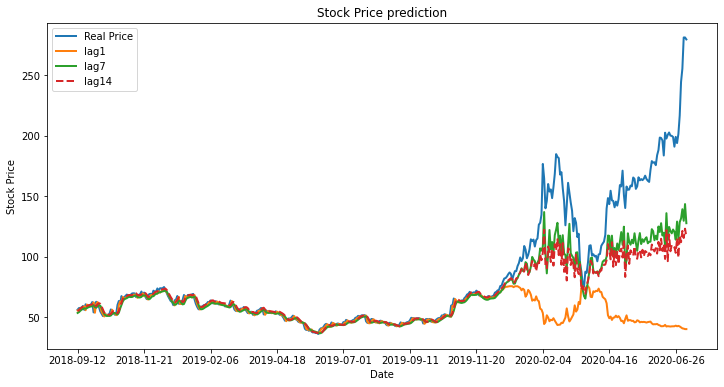

In [20]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(12, 6))

plt.plot(df.loc[nrow:, 'Date'], df.iloc[nrow:, 1:2].values, lw=2, label = 'Real Price')
plt.plot(df.loc[nrow:, 'Date'], pred_lag1, lw=2, label = 'lag1')
plt.plot(df.loc[nrow:, 'Date'], pred_lag7, lw=2, label = 'lag7')
plt.plot(df.loc[nrow:, 'Date'], pred_lag14, lw=2, ls='--', label = 'lag14')

plt.xticks(np.arange(0, 459, 50))
plt.title('Stock Price prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## **Mean squared error of models with different lags**

In [21]:
mse_lag1 = mean_squared_error(df.iloc[nrow:, 1:2].values, pred_lag1)
mse_lag7 = mean_squared_error(df.iloc[nrow:, 1:2].values, pred_lag7)
mse_lag14 = mean_squared_error(df.iloc[nrow:, 1:2].values, pred_lag14)

pd.DataFrame([[mse_lag1, mse_lag7, mse_lag14]], 
             columns=['MSE_lag1', 'MSE_lag7', 'MSE_lag14'])

,MSE_lag1,MSE_lag7,MSE_lag14
0,3324.425042,774.649428,1040.953905


## **Model with 4 hidden layers VS Model with 6 hidden layers (using lag7 in both models)**

**Define the model with 6 hidden layers**

In [22]:
def model_LSEM6(n_units, drop_rate, X_train):
    model = Sequential()

    model.add(LSTM(units = n_units, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    model.add(Dropout(drop_rate))

    model.add(LSTM(units = n_units, return_sequences = True))
    model.add(Dropout(drop_rate))

    model.add(LSTM(units = n_units, return_sequences = True))
    model.add(Dropout(drop_rate))

    model.add(LSTM(units = n_units, return_sequences = True))
    model.add(Dropout(drop_rate))

    model.add(LSTM(units = n_units, return_sequences = True))
    model.add(Dropout(drop_rate))

    model.add(LSTM(units = n_units))
    model.add(Dropout(drop_rate))

    model.add(Dense(units = 1))

    return model

**Compile and fit this model**

In [23]:
model_lag7_layer6 = model_LSEM6(50, 0.2, X_train_lag7)

model_lag7_layer6.compile(optimizer = 'adam', loss = 'mean_squared_error')

model_lag7_layer6.fit(X_train_lag7, y_train_lag7, epochs = 100, batch_size = 32)


Epoch 1/100
25/25 [==============================] - 12s 31ms/step - loss: 0.1330
Epoch 2/100
25/25 [==============================] - 1s 30ms/step - loss: 0.0358
Epoch 3/100
25/25 [==============================] - 1s 30ms/step - loss: 0.0117
Epoch 4/100
25/25 [==============================] - 1s 29ms/step - loss: 0.0099
Epoch 5/100
25/25 [==============================] - 1s 30ms/step - loss: 0.0094
Epoch 6/100
25/25 [==============================] - 1s 32ms/step - loss: 0.0084
Epoch 7/100
25/25 [==============================] - 1s 31ms/step - loss: 0.0081
Epoch 8/100
25/25 [==============================] - 1s 31ms/step - loss: 0.0075
Epoch 9/100
25/25 [==============================] - 1s 31ms/step - loss: 0.0078
Epoch 10/100
25/25 [==============================] - 1s 31ms/step - loss: 0.0082
Epoch 11/100
25/25 [==============================] - 1s 31ms/step - loss: 0.0073
Epoch 12/100
25/25 [==============================] - 1s 31ms/step - loss: 0.0083
Epoch 13/100
25/25 [====

**Prediction by the model with 6 hidden layers**

In [24]:

pred_lag7_layer6 = model_lag7_layer6.predict(X_test_lag7)
pred_lag7_layer6 = sc.inverse_transform(pred_lag7_layer6)

**Plot the predicted price**

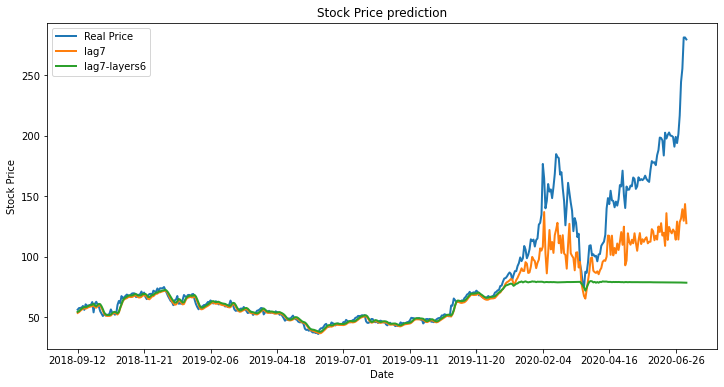

In [25]:
figure(figsize=(12, 6))

plt.plot(df.loc[nrow:, 'Date'], df.iloc[nrow:, 1:2].values, lw=2, label = 'Real Price')
plt.plot(df.loc[nrow:, 'Date'], pred_lag7, lw=2, label = 'lag7')
plt.plot(df.loc[nrow:, 'Date'], pred_lag7_layer6, lw=2, label = 'lag7-layers6')

plt.xticks(np.arange(0, 459, 50))
plt.title('Stock Price prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

**Mean squared error**

In [26]:

mse_lag7_layer6 = mean_squared_error(df.iloc[nrow:, 1:2].values, pred_lag7_layer6)

pd.DataFrame([[mse_lag7, mse_lag7_layer6]], 
             columns=['MSE_lag7', 'MSE_lag7_layer6'])

,MSE_lag7,MSE_lag7_layer6
0,774.649428,1891.951589


## **Model with 4 hidden layers (dropout = 0.2) VS Model with 4 hidden layers (dropout=0.4) (using lag14 in both models)**

**Train the model with 4 hidden layers (dropout =0.4)**

In [27]:
model_lag14_drop4 = model_LSEM(50, 0.4, X_train_lag14)

model_lag14_drop4.compile(optimizer = 'adam', loss = 'mean_squared_error')

model_lag14_drop4.fit(X_train_lag14, y_train_lag14, epochs = 100, batch_size = 32)

Epoch 1/100
25/25 [==============================] - 8s 34ms/step - loss: 0.0769
Epoch 2/100
25/25 [==============================] - 1s 34ms/step - loss: 0.0252
Epoch 3/100
25/25 [==============================] - 1s 34ms/step - loss: 0.0183
Epoch 4/100
25/25 [==============================] - 1s 35ms/step - loss: 0.0158
Epoch 5/100
25/25 [==============================] - 1s 34ms/step - loss: 0.0134
Epoch 6/100
25/25 [==============================] - 1s 36ms/step - loss: 0.0136
Epoch 7/100
25/25 [==============================] - 1s 35ms/step - loss: 0.0144
Epoch 8/100
25/25 [==============================] - 1s 35ms/step - loss: 0.0122
Epoch 9/100
25/25 [==============================] - 1s 36ms/step - loss: 0.0119
Epoch 10/100
25/25 [==============================] - 1s 35ms/step - loss: 0.0148
Epoch 11/100
25/25 [==============================] - 1s 35ms/step - loss: 0.0134
Epoch 12/100
25/25 [==============================] - 1s 34ms/step - loss: 0.0141
Epoch 13/100
25/25 [=====

**Prediction**

In [28]:
pred_lag14_drop4 = model_lag14_drop4.predict(X_test_lag14)
pred_lag14_drop4 = sc.inverse_transform(pred_lag14_drop4)

**plot**

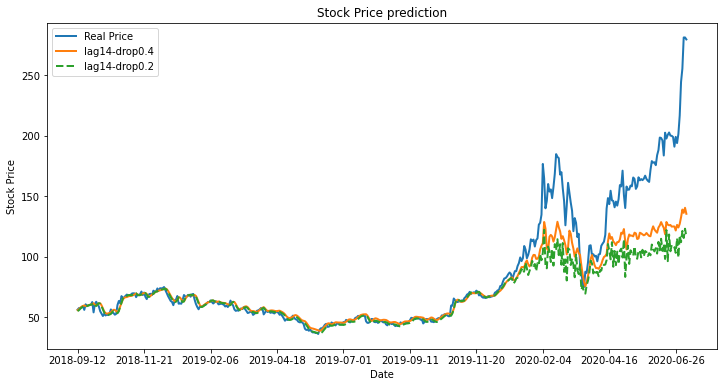

In [29]:
figure(figsize=(12, 6))

plt.plot(df.loc[nrow:, 'Date'], df.iloc[nrow:, 1:2].values, lw=2, label = 'Real Price')
plt.plot(df.loc[nrow:, 'Date'], pred_lag14_drop4, lw=2, label = 'lag14-drop0.4')
plt.plot(df.loc[nrow:, 'Date'], pred_lag14, lw=2, ls='--',label = 'lag14-drop0.2')

plt.xticks(np.arange(0, 459, 50))
plt.title('Stock Price prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

**MSE**

In [30]:
mse_lag14_drop4 = mean_squared_error(df.iloc[nrow:, 1:2].values, pred_lag14_drop4)

pd.DataFrame([[mse_lag14, mse_lag14_drop4]], 
             columns=['MSE_lag14', 'MSE_lag14_drop4'])

,MSE_lag14,MSE_lag14_drop4
0,1040.953905,669.244215


## **Make predictions for the stock prices in the future**

In [31]:
date_future = pd.date_range("07-10-2020", "10-1-2020")
num_future = len(date_future)

In [32]:
pred = []
X_input = X_test_lag14[-1, :, :]
yhat = sc.transform(df.iloc[-1, 1:2].values.reshape(-1,1))

for i in range(num_future):
    temp = np.append(X_input, yhat)
    X_input = temp[1:].reshape(1, 14, 1)
    yhat = model_lag14_drop4.predict(X_input)
    pred.append(yhat)



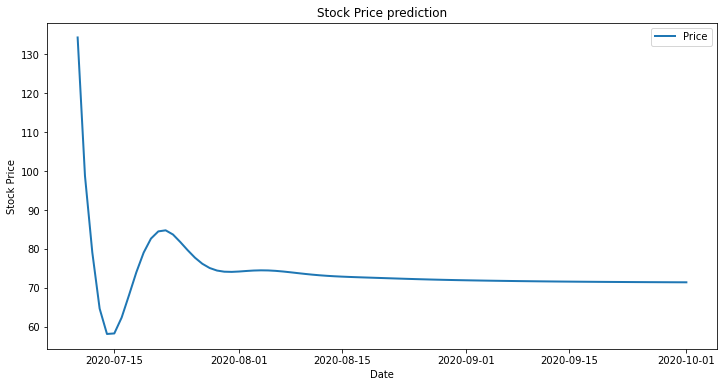

In [33]:
figure(figsize=(12, 6))

plt.plot(date_future, sc.inverse_transform(np.array(pred).reshape(-1, 1)), lw=2, label = 'Price')

plt.title('Stock Price prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## **References**

1. https://towardsdatascience.com/lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model-6223e9644a2f


2. https://predictivehacks.com/predict-stock-prices-with-lstm/
